In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Flatten,InputLayer
import keras
import imageio # to read images
from PIL import Image
import warnings
warnings.filterwarnings('ignore',category=DeprecationWarning)

In [2]:
train = pd.read_csv(r"C:\Users\DeveshNarain\age_detection\age_detection_train\train.csv")
test = pd.read_csv(r"C:\Users\DeveshNarain\age_detection\age_detection_test\test.csv")

In [3]:
train

,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE
3,16496.jpg,YOUNG
4,4487.jpg,MIDDLE
...,...,...
19901,2482.jpg,MIDDLE
19902,20085.jpg,YOUNG
19903,19663.jpg,MIDDLE
19904,10132.jpg,MIDDLE


In [4]:
test

,ID
0,25321.jpg
1,989.jpg
2,19277.jpg
3,13093.jpg
4,5367.jpg
...,...
6631,1876.jpg
6632,14940.jpg
6633,3638.jpg
6634,376.jpg


Age group: MIDDLE


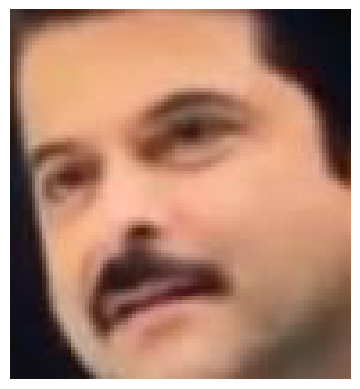

In [5]:
np.random.seed(10)
idx = np.random.choice(train.index)
img_name = train.loc[idx,"ID"]
img = imageio.imread(os.path.join(r"D:\infosys certification\datasets\age_detection_train\Train",img_name))
print("Age group:",train.loc[idx,"Class"])
plt.imshow(img)
plt.axis('off')
plt.show()

In [6]:
temp = []
for img_name in train["ID"]:
    img_path = os.path.join(r"D:\infosys certification\datasets\age_detection_train\Train",img_name)
    img = imageio.imread(img_path)
    img = np.array(Image.fromarray(img).resize((32,32))).astype('float32')
    temp.append(img)
train_x = np.stack(temp)

In [7]:
temp = []
for img_name in test['ID']:
    img_path = os.path.join(r"D:\infosys certification\datasets\age_detection_test\Test",img_name)
    img = imageio.imread(img_path)
    img = np.array(Image.fromarray(img).resize((32,32))).astype('float32')
    temp.append(img)
test_x = np.stack(temp)

In [8]:
test_x

array([[[[ 27.,  22.,  18.],
         [ 26.,  22.,  18.],
         [ 25.,  22.,  17.],
         ...,
         [ 25.,  23.,  19.],
         [ 27.,  26.,  23.],
         [ 27.,  27.,  25.]],

        [[ 28.,  25.,  20.],
         [ 24.,  22.,  17.],
         [ 23.,  23.,  17.],
         ...,
         [ 16.,  13.,  10.],
         [ 23.,  22.,  18.],
         [ 30.,  29.,  27.]],

        [[ 21.,  22.,  17.],
         [ 19.,  20.,  14.],
         [ 25.,  26.,  20.],
         ...,
         [ 19.,  15.,  11.],
         [ 24.,  23.,  18.],
         [ 28.,  28.,  24.]],

        ...,

        [[165., 132., 125.],
         [167., 134., 127.],
         [169., 136., 129.],
         ...,
         [ 22.,  15.,   8.],
         [ 18.,  14.,   8.],
         [ 14.,  14.,   6.]],

        [[152., 119., 112.],
         [154., 121., 114.],
         [157., 124., 117.],
         ...,
         [ 16.,  12.,   5.],
         [ 14.,  13.,   6.],
         [ 15.,  17.,   9.]],

        [[139., 106.,  99.],
       

In [9]:
# normalization
train_x = train_x/255.0
test_x = test_x/255.0

In [10]:
# encoding of categorical variables(young,middle and old) to numerical
lb = LabelEncoder()
train_y = lb.fit_transform(train.Class)
train_y = to_categorical(train_y) # similar to one hot encoding

In [11]:
train_y

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [12]:
input_num_units = (32,32,3)
hidden_num_units = 500
output_num_units = 3

epochs = 5
batch_size = 128

In [13]:
model = Sequential([
    InputLayer(shape = input_num_units),
    Flatten(),
    Dense(units = hidden_num_units, activation = "relu"),
    Dense(units = output_num_units, activation = "softmax") # multilabel classification
])
    

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 500)                 │       1,536,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │           1,503 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,538,003 (5.87 MB)

 Trainable params: 1,538,003 (5.87 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# compiling and training the network
model.compile(optimizer = "sgd", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [16]:
model.fit(train_x, train_y, batch_size=batch_size, epochs=epochs, verbose=2, validation_split=0.2)

Epoch 1/5
125/125 - 6s - 50ms/step - accuracy: 0.5599 - loss: 0.9098 - val_accuracy: 0.6057 - val_loss: 0.8619
Epoch 2/5
125/125 - 2s - 17ms/step - accuracy: 0.5946 - loss: 0.8590 - val_accuracy: 0.6123 - val_loss: 0.8351
Epoch 3/5
125/125 - 2s - 14ms/step - accuracy: 0.6086 - loss: 0.8386 - val_accuracy: 0.5886 - val_loss: 0.8560
Epoch 4/5
125/125 - 2s - 14ms/step - accuracy: 0.6128 - loss: 0.8286 - val_accuracy: 0.4782 - val_loss: 0.9587
Epoch 5/5
125/125 - 2s - 16ms/step - accuracy: 0.6162 - loss: 0.8198 - val_accuracy: 0.6306 - val_loss: 0.8015


In [17]:
# predicting and importing the result to a csv file
pred = model.predict(test_x)
pred = np.argmax(pred,axis=1)
pred = lb.inverse_transform(pred)

test["Class"] = pred
test.to_csv('out.csv',index=False)

208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


623/623 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step
Original: MIDDLE Predicted: MIDDLE


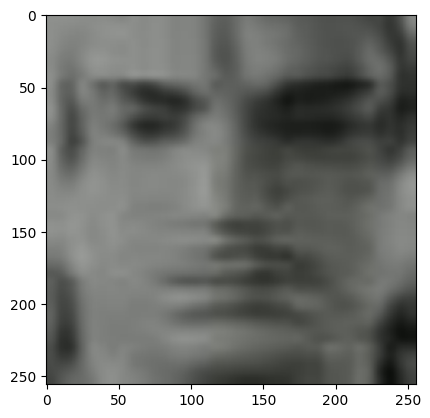

In [18]:
# visual inspection of predictions
idx = 2481
# img_name = test.loc[idx,"ID"]
img_name1 = train.loc[idx,"ID"]
# img1 = imageio.imread(os.path.join(r"D:\infosys certification\datasets\age_detection_test\Test",img_name))
img2 = imageio.imread(os.path.join(r"D:\infosys certification\datasets\age_detection_train\Train",img_name1))
# plt.imshow(np.array(Image.fromarray(img1).resize((256,256))))
plt.imshow(np.array(Image.fromarray(img2).resize((256,256))))
pred = np.argmax(model.predict(train_x),axis=1) 
pred = lb.inverse_transform(pred)
print("Original:", train.Class[idx], "Predicted:", pred[idx])

# Hyperparameter Tuning

In [19]:
epochs = 100

In [20]:
model = Sequential([
    InputLayer(shape = input_num_units),
    Flatten(),
    Dense(units = hidden_num_units, activation = "relu"),
    Dense(units = output_num_units, activation = "softmax") # multilabel classification
])

In [21]:
# optimization algorithms
import re
def models_with_different_optimizers(list_of_optimizers):
    for i in range(len(list_of_optimizers)):
        model.compile(loss="categorical_crossentropy",
                      optimizer=list_of_optimizers[i],
                      metrics=["accuracy"])
        # training the model and writing log files for TensorBoard 
        # in distinct directories
        val = re.search('optimizers\..*\so',str(list_of_optimizers[i])).group(0)[11:][:-2]
        # extracting optimizer name from the current optimizer object
        logdir = r"optims\\" + val
        # each log file needs to be written in a distinct directory
        cb = keras.callbacks.TensorBoard(log_dir=logdir,write_graph=False)
        # writing graph will take time thus setting it to False
        print("Building model using "+ val+ 'optimizer')
        history = model.fit(train_x,train_y,epochs=epochs,validation_split=0.2,
        callbacks=[cb])
        print("Model built successfully")
        print('')
# listing the optimizers
optims = [keras.optimizers.Adam(),keras.optimizers.Adadelta(),
          keras.optimizers.Adagrad(),keras.optimizers.RMSprop(),
          keras.optimizers.SGD()]
# calling the function
models_with_different_optimizers(optims)

Building model using adam.Adamoptimizer
Epoch 1/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - accuracy: 0.5453 - loss: 1.1770 - val_accuracy: 0.5613 - val_loss: 0.8753
Epoch 2/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.6055 - loss: 0.8404 - val_accuracy: 0.6243 - val_loss: 0.7959
Epoch 3/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - accuracy: 0.6173 - loss: 0.8223 - val_accuracy: 0.6354 - val_loss: 0.7897
Epoch 4/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - accuracy: 0.6393 - loss: 0.7949 - val_accuracy: 0.6308 - val_loss: 0.8314
Epoch 5/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.6390 - loss: 0.7867 - val_accuracy: 0.6575 - val_loss: 0.7661
Epoch 6/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.6566 - loss: 0.7677 - val_accuracy: 0.6283 - val_loss: 0.8043
Epoch 7/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - accuracy: 0.6505 - loss: 0.7654 - val_accuracy: 0.6612 - val_loss: 0.7625
Epoch 8/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 17

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



498/498 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.8311 - loss: 0.4191 - val_accuracy: 0.6981 - val_loss: 0.8328
Epoch 35/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.8297 - loss: 0.4111 - val_accuracy: 0.6974 - val_loss: 0.8325
Epoch 36/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.8303 - loss: 0.4130 - val_accuracy: 0.6999 - val_loss: 0.8358
Epoch 46/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.8330 - loss: 0.4102 - val_accuracy: 0.6989 - val_loss: 0.8356
Epoch 47/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.8335 - loss: 0.4109 - val_accuracy: 0.6996 - val_loss: 0.8359
Epoch 48/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.8224 - loss: 0.4201 - val_accuracy: 0.6996 - val_loss: 0.8364
Epoch 49/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.8327 - loss: 0.4224 - val_accuracy: 0.6991 - val_loss: 0.8364
Epoch 50/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.8377 - loss: 0.4028

In [24]:
# run on TensorBoard
# tensorboard --logdir=optims/ --host localhost --port 8088

In [25]:
# Adam optimizer showed good results

In [ ]:
# activation functions
def models_with_different_activation_fn(list_of_activation_fn):
    for i in range(len(list_of_activation_fn)):
        # defining the network
        model = Sequential([
            InputLayer(shape=input_num_units),
            Flatten(), # transforms multi-dimensional data to one-dimensional
            Dense(units=hidden_num_units,activation=list_of_activation_fn[i]),
            Dense(units=output_num_units,activation='softmax')
        ])
        model.compile(loss='categorical_crossentropy',
                      optimizer=keras.optimizers.Adam(),
        metrics=['accuracy'])
        # training the model and writing log files for TensorBoard in distinct directories
        logdir = r'activation\\' + list_of_activation_fn[i]
        # each log file needs to be written in a distinct directory
        cb = keras.callbacks.TensorBoard(log_dir=logdir,write_graph=False)

        print("Log directory:", logdir)
        print('Building model using ' + 
              list_of_activation_fn[i] + ' activation function')
        history = model.fit(train_x,train_y,epochs=epochs,
                            validation_split=0.2,callbacks=[cb])
        print('Model built successfully')
        print('')
# list of activation functions
act = ['linear','sigmoid','relu','tanh','softmax']

models_with_different_activation_fn(act)

Log directory: activation\\linear
Building model using linear activation function
Epoch 1/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.5259 - loss: 1.6794 - val_accuracy: 0.5663 - val_loss: 0.8895
Epoch 2/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.6050 - loss: 0.8562 - val_accuracy: 0.6298 - val_loss: 0.8049
Epoch 3/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.6158 - loss: 0.8316 - val_accuracy: 0.6226 - val_loss: 0.8294
Epoch 4/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 24s 47ms/step - accuracy: 0.6267 - loss: 0.8148 - val_accuracy: 0.5999 - val_loss: 0.8593
Epoch 5/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.6209 - loss: 0.8177 - val_accuracy: 0.6386 - val_loss: 0.7985
Epoch 6/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 21s 43ms/step - accuracy: 0.6200 - loss: 0.8218 - val_accuracy: 0.6447 - val_loss: 0.7856
Epoch 7/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 22s 45ms/step - accuracy: 0.6230 - loss: 0.8284 - val_accuracy: 0.6258 - val_loss: 0.8037
E

In [ ]:
# run on TensorBoard
# tensorboard --logdir=activation/ --host localhost --port 8088

In [ ]:
# relu or sigmoid

In [ ]:
# pip install --upgrade keras-lr-finder

In [ ]:
# significant drop between 1e-4 and 1e-3(or b/w 0.0001 and 0.001)

# Learning Rate

In [ ]:
import keras_lr_finder as lr_find
import keras.backend as K
model.compile(optimizer='adam', loss='categorical_crossentropy')

lr_finder = lr_find.LRFinder(model)
# training can stop abruptly if rate is set too high. In such cases, reduce the 
# value of end_lr
lr_finder.find(train_x,train_y,start_lr=0.0001,end_lr=0.09,batch_size=batch_size
               ,epochs=epochs)
# plot the loss, ignore 20 batches in the beginning and 5 in the end
lr_finder.plot_loss(n_skip_beginning=20, n_skip_end=5)

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

class CyclicLR(Callback):
    """This callback implements a cyclical learning rate policy (CLR)."""
    def __init__(self, base_lr=0.001, max_lr=0.006, step_size=2000., mode='triangular',
                 gamma=1., scale_fn=None, scale_mode='cycle'):
        super(CyclicLR, self).__init__()

        self.base_lr = base_lr
        self.max_lr = max_lr
        self.step_size = step_size
        self.mode = mode
        self.gamma = gamma
        if scale_fn is None:
            if self.mode == 'triangular':
                self.scale_fn = lambda x: 1.
                self.scale_mode = 'cycle'
            elif self.mode == 'triangular2':
                self.scale_fn = lambda x: 1 / (2. ** (x - 1))
                self.scale_mode = 'cycle'
            elif self.mode == 'exp_range':
                self.scale_fn = lambda x: gamma ** (x)
                self.scale_mode = 'iterations'
        else:
            self.scale_fn = scale_fn
            self.scale_mode = scale_mode
        self.clr_iterations = 0.
        self.trn_iterations = 0.
        self.history = {}

    def clr(self):
        cycle = np.floor(1 + self.clr_iterations / (2 * self.step_size))
        x = np.abs(self.clr_iterations / self.step_size - 2 * cycle + 1)
        if self.scale_mode == 'cycle':
            return self.base_lr + (self.max_lr - self.base_lr) * np.maximum(0, (1 - x)) * self.scale_fn(cycle)
        else:
            return self.base_lr + (self.max_lr - self.base_lr) * np.maximum(0, (1 - x)) * self.scale_fn(self.clr_iterations)
        
    def on_train_begin(self, logs=None):
        logs = logs or {}

        # Set initial learning rate
        self.model.optimizer.learning_rate.assign(self.base_lr)
        
    def on_batch_end(self, batch, logs=None):
        logs = logs or {}
        self.trn_iterations += 1
        self.clr_iterations += 1

        # Update learning rate
        lr = self.clr()
        self.model.optimizer.learning_rate.assign(lr)

        self.history.setdefault('lr', []).append(lr)
        self.history.setdefault('iterations', []).append(self.trn_iterations)

        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)


In [ ]:
# importing cyclic learning rate module

# pass the values of base_lr with the value of
cb_triangular = CyclicLR(base_lr=0.0001,max_lr=0.001,step_size=2000,
                         mode='triangular2') # setting callback for model
# writing graph will take time. Hence, keep it False
cb_save = keras.callbacks.TensorBoard(log_dir="learning_rate",write_graph=False)

model.fit(train_x,train_y,batch_size=batch_size,epochs=epochs,
          validation_split=0.2,callbacks=[cb_triangular,cb_save],verbose=1)
print("Model built successfully")
plt.xlabel("Training iterations")
plt.ylabel("Learning rate")
plt.title("CLR - 'triangular2' Policy")
plt.plot(cb_triangular.history['iterations'], cb_triangular.history['lr'])

# with more number of iterations the graph will correspond
# to that of a triangular wave

# Initial Weights

In [ ]:
# initial weights
def weight_initialization(list_of_weight,weight_names):
    for i in range(len(list_of_weights)):
        model = Sequential([
            InputLayer(shape=input_num_units),
            Flatten(),
            Dense(units=hidden_num_units, activation="relu",
                  kernel_initializer=list_of_weights[i]),
            Dense(units=output_num_units,activation="softmax",
                 kernel_initializer=list_of_weights[i]),
        ])
        model.compile(loss="categorical_crossentropy", 
                      optimizer=keras.optimizers.Adam(), metrics=["accuracy"])
        logdir = r'weights\\' + weight_names[i]
        cb = keras.callbacks.TensorBoard(log_dir=logdir,write_graph=False)
        print("logdir: ",logdir)
        print("Model building using " + weight_names[i] + "initializer")
        history = model.fit(train_x,train_y,epochs=epochs,
        validation_split=0.2,callbacks=[cb])
        print("Model built successfully.")
        print('')
        
list_of_weights = [keras.initializers.RandomNormal(),
                   keras.initializers.glorot_normal(),
                   keras.initializers.he_normal(),
                   keras.initializers.Orthogonal()]
weight_names = ["Random", "Glorot", "He", "Orthogonal"]

weight_initialization(list_of_weights,weight_names)

In [ ]:
# bias initializer
def bias_initializer(list_of_biases,bias_names):
    for i in range(len(list_of_biases)):
        model = Sequential([
            InputLayer(shape=input_num_units),
            Flatten(),
            Dense(units=hidden_num_units,bias_initializer=list_of_biases[i],
                  activation="relu"),
            Dense(units=output_num_units,activation="softmax"),
        ])
        model.compile(loss="categorical_crossentropy",
                      optimizer=keras.optimizers.Adam(),metrics=["accuracy"])
        logdir = r'biases\\' + bias_names[i]
        cb = keras.callbacks.TensorBoard(log_dir=logdir,write_graph=False)
        print("logdir: ",logdir)
        print("Building model using " + bias_names[i] + " initializer")
        history = model.fit(train_x,train_y,epochs=epochs,validation_split=0.2,callbacks=[cb])
        print("Model built successfully.")
        print('')

list_of_biases = [keras.initializers.Zeros(),keras.initializers.Constant(value=0.01),keras.initializers.Constant(value=0.1)]
bias_names = ['0', '0.01', '0.1']
# Calling the function
bias_initializer(list_of_biases, bias_names)

In [ ]:
# maxnorm(3) sets a limit on the magnitude of weights in a neural network, 
# i.e. the weights can take a maximum value of 3 both in both +ve and -ve directions
# (-3 or +3 but not -4 or +4)

In [ ]:
# number of nodes in a layer
from keras.layers import Dropout
from tensorflow.keras.constraints import MaxNorm
model = Sequential([
    InputLayer(shape=input_num_units),
    Flatten(),
    # Dropout layer can also be added between input layer and first hidden layer.
    # according to dropout paper, the maximum norm of weights should not exceed a value of 3. Hence, defining constraint maxnorm(3)
    Dense(units=hidden_num_units,activation='relu',
          kernel_constraint=MaxNorm(3)),
    Dropout(0.30),
    Dense(units=output_num_units,activation="softmax")
])
# defining parameters like optimizer, loss function and evaluating metric
model.compile(loss="categorical_crossentropy",optimizer=keras.optimizers.Adam(),
              metrics=["accuracy"])
cb = keras.callbacks.TensorBoard(log_dir='dropout',write_graph=False)
history = model.fit(train_x,train_y,epochs=epochs,
                    validation_split=0.2,callbacks=[cb])

In [ ]:
# ridge,lasso and elastic net regression
epochs = 21
def regularization(list_of_regs,reg_names):
    for i in range(len(list_of_regs)):
        # writing structure of model
        model = Sequential([
            InputLayer(shape=input_num_units),
            Flatten(),
            Dense(units=hidden_num_units,activation="relu",
                  kernel_regularizer=list_of_regs[i]),
            Dense(units=output_num_units,activation="softmax")
        ])
        model.compile(loss="categorical_crossentropy",
                      optimizer=keras.optimizers.Adam(),metrics=["accuracy"])
        logdir = r'regularizers\\' + reg_names[i]
        cb = keras.callbacks.TensorBoard(log_dir=logdir,write_graph=False)
        print("logdir:",logdir)
        print("Model built using " + reg_names[i] + "regularizer")
        history = model.fit(train_x, train_y, epochs=epochs, 
                           validation_split=0.2,
                           callbacks=[cb])
        print('Model built successfully.')
        print('')
# Value of lambda can be calculated using cross-validation
list_of_regs = [keras.regularizers.l2(), keras.regularizers.l1(), keras.regularizers.l1_l2()] 
reg_names = ['Ridge.L2', 'Lasso.L1', 'Elastic.Net.L1.L2']
regularization(list_of_regs, reg_names)

In [ ]:
# number of epochs
model = Sequential([
          InputLayer(input_shape=input_num_units),
          Flatten(),
          Dense(units=hidden_num_units, activation='relu'),
          Dense(units=output_num_units, activation='softmax'),
        ])
# Defining parameters like optmizer, loss function and evaluating metric
model.compile(loss='categorical_crossentropy', # 
        optimizer=keras.optimizers.Adam(), # Learning rate and momentum can be passed inside optimizer
        metrics=['accuracy'])
# after every 8 iterations the training is stopped if not improved in 'val_loss'
# is seen
cb_early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',patience=8,min_delta=0.02) # min delta tells us that minimum improvement of 
# 0.02 difference is required in val_loss after epochs
cb = keras.callbacks.TensorBoard(log_dir="early_stop",write_graph=False)
history = model.fit(train_x, train_y, epochs=epochs, validation_split=0.2, callbacks=[cb, cb_early_stop])

In [ ]:
# Specifying all the parameters we will be using in our network
input_num_units = (32, 32, 3)
hidden_num_units = 500
output_num_units = 3
# Optimum values
optimizer = keras.optimizers.Adam()
cb_triangular_lr = CyclicLR(base_lr=0.0001, max_lr=0.001, step_size=2000., mode='triangular2') 
activation = 'relu'
weights = keras.initializers.he_normal()
bias = keras.initializers.Constant(value=0.01)
dropout = 0.30
regularizer = keras.regularizers.l2() 
epochs = 19
batch_size = 128


In [ ]:
# Defining the network
from keras.layers import Dropout
from tensorflow.keras.constraints import MaxNorm
model = Sequential([
  InputLayer(shape=input_num_units),
  Flatten(),
  Dense(units=hidden_num_units, kernel_initializer=weights, 
        bias_initializer=bias, activation=activation, 
       kernel_constraint=MaxNorm(3),
       kernel_regularizer=regularizer),
  Dropout(dropout),
  Dense(units=output_num_units, kernel_initializer=weights, activation='softmax'),
])


In [ ]:
train_x.shape

In [ ]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Compiling and Training Network
cb = keras.callbacks.TensorBoard(log_dir='optimum_model', write_graph=False) 
model.fit(train_x, train_y, batch_size=batch_size, epochs=epochs, verbose=1, 
         validation_split=0.2, callbacks = [cb])

In [ ]:
# Saving the model
model.save('optimum_model.keras')
# Loading the model
from keras.models import load_model
model = load_model('optimum_model.keras')